In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [5]:
#Identify Numerical Columns:
numerical_df = df.select_dtypes(include=['number'])

In [6]:
numerical_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [7]:
#Calculate Basic Statistical Measures:
mean_values = numerical_df.mean()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]  # mode() returns a DataFrame
std_dev_values = numerical_df.std()

In [8]:
mean_values 
median_values 
mode_values
std_dev_values 

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

NameError: name 'plt' is not defined

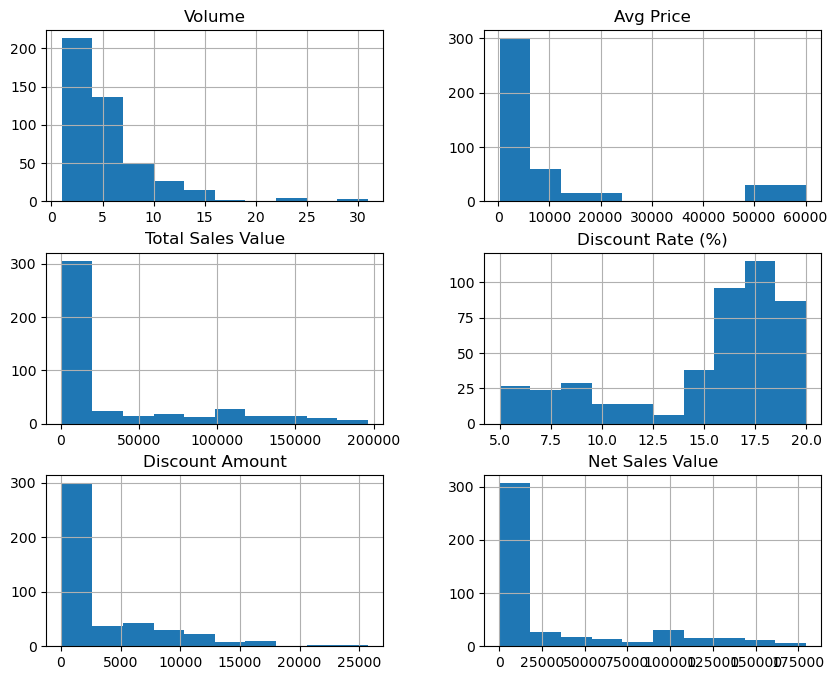

In [10]:
#Data Visualization
#Histograms:
numerical_df.hist(figsize=(10, 8))
plt.show()

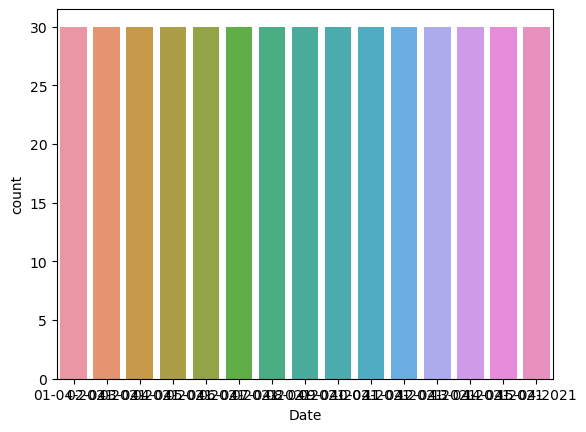

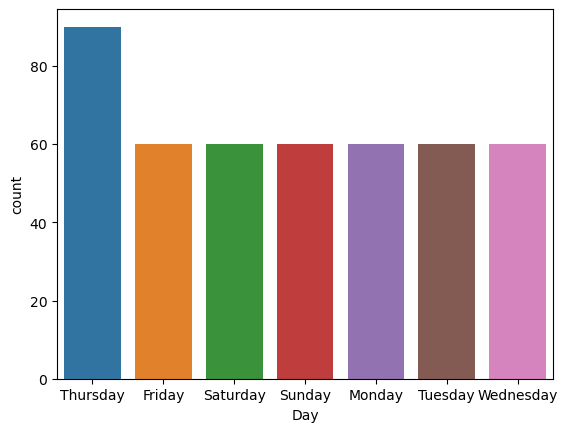

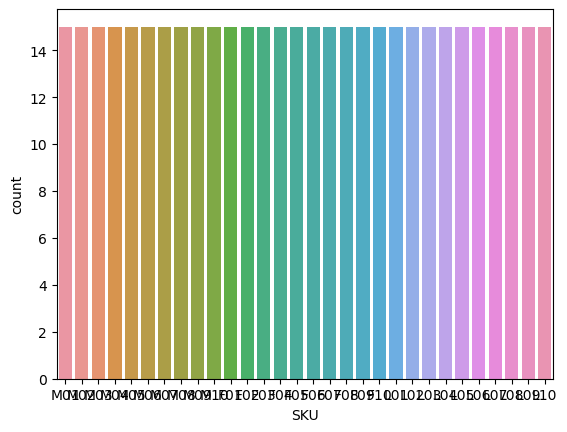

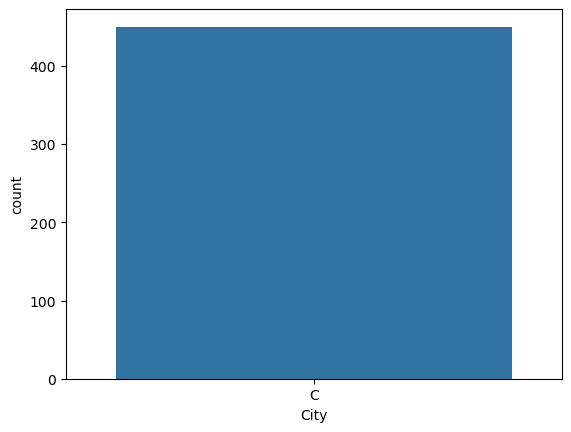

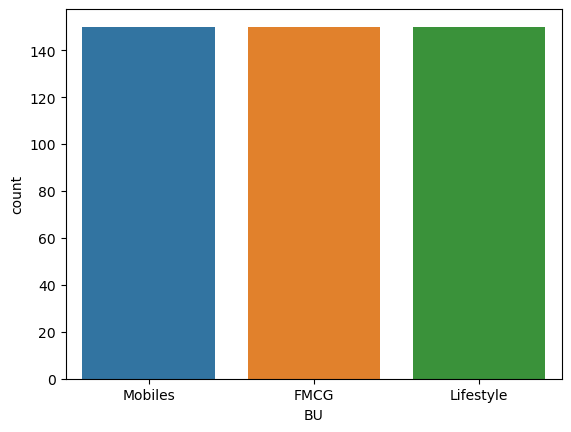

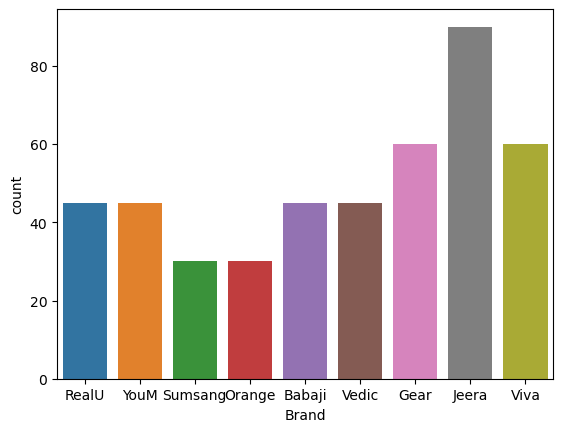

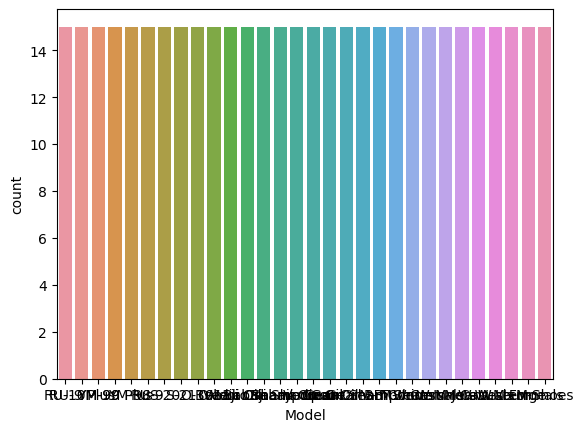

In [16]:
# Bar Chart Analysis for Categorical Columns:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the DataFrame 'df' is defined and contains the expected data
categorical_df = df.select_dtypes(include=['object'])
for column in categorical_df.columns:
    sns.countplot(x=column, data=df)
    plt.show()

In [18]:
#Standardization of Numerical Variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data_standardized = scaler.fit_transform(numerical_df)

In [19]:
numerical_data_standardized 

array([[ 2.35002911,  0.091173  ,  2.92572115, -0.83028851,  3.95281631,
         2.80475594],
       [ 1.16712855, -0.01957016,  1.33099521, -0.85266145,  1.84901409,
         1.2710262 ],
       [ 0.45738822,  0.31265934,  1.56277525, -1.35163138,  1.62299458,
         1.54567497],
       ...,
       [-0.72551234, -0.49022863, -0.60644824,  0.90379261, -0.60813967,
        -0.60192115],
       [-0.48893223, -0.47361715, -0.55692259,  0.38847428, -0.53037877,
        -0.55549857],
       [-0.96209245, -0.40717125, -0.60842926,  0.04223476, -0.63734468,
        -0.60123949]])

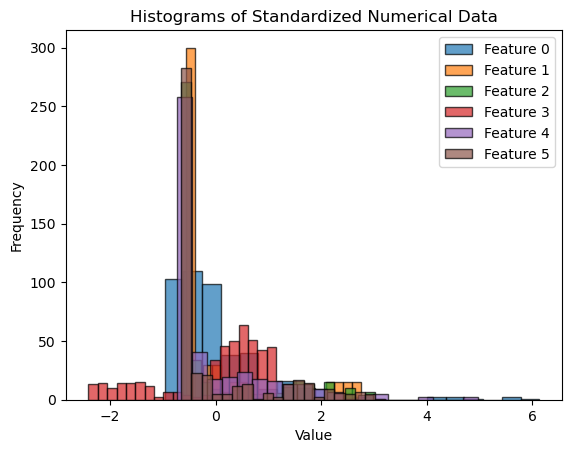

In [22]:
import matplotlib.pyplot as plt

# Plot histograms for each column in the array
for i in range(numerical_data_standardized.shape[1]):
    plt.hist(numerical_data_standardized[:, i], bins=20, edgecolor='black', alpha=0.7, label=f'Feature {i}')

plt.legend(loc='upper right')
plt.title('Histograms of Standardized Numerical Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# It is positive skewed data because there is a long tail on the right side of histogram.

In [28]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, columns=['Day', 'Day','City','BU','Brand','Model','SKU'])

In [29]:
df_dummies 

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,SKU_M01,SKU_M02,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,15-04-2021,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,...,False,False,False,False,False,False,False,False,False,False
447,15-04-2021,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,...,False,False,False,False,False,False,False,False,False,False
448,15-04-2021,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
df_dummies.head() 

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,SKU_M01,SKU_M02,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
#Summary Statistics
1.Volume: 
4.23
4.23

Interpretation: On average, approximately 4.23 items were sold per transaction or record.

2.Avg Price: 18
,
079.90
18,079.90

Interpretation: The average price per item is around $18,079.90. This suggests that the products or services sold are relatively high-priced.
3.Total Sales Value: 50
,
535.07
50,535.07

Interpretation: The average total sales value per transaction or record is $50,535.07. This is the revenue generated before applying discounts.
4.Discount Rate (%): 
4.22
%
4.22%

Interpretation: The average discount rate applied to the items is approximately 4.22%. This is relatively low, indicating that discounts are modest.
5.Discount Amount: 4
,
509.90
4,509.90

Interpretation: On average, the discount amount per transaction or record is $4,509.90. This represents the monetary value of the discount provided.
6.Net Sales Value: 46
,
358.66
46,358.66

Interpretation: After applying discounts, the average net sales value is $46,358.66. This is the actual revenue after discount adjustments.

#Insights from Summary Statistics
Revenue Contribution:

The average total sales value ($50,535.07) indicates that sales are significant before discounts. The average net sales value ($46,358.66) shows a reduction due to discounts.
Discount Impact:

The average discount rate of 4.22% results in an average discount amount of $4,509.90. This suggests that discounts are applied but are not substantial enough to drastically affect the total revenue.
Pricing and Volume:

With an average item price of $18,079.90 and an average volume of 4.23, the pricing strategy might be aimed at higher-value transactions with moderate sales volume.
Net Sales Value:

The average net sales value being lower than the total sales value reflects the impact of discounts. This is a crucial metric for understanding actual revenue after discounts.
Conclusions
Discount Efficiency:

The modest average discount rate suggests that discounts are used strategically without heavily impacting the sales value. It would be useful to analyze if higher discounts correlate with higher volumes or sales.
Revenue Optimization:

The average total sales value indicates that the revenue per transaction is significant. Considering the average volume is relatively low, focusing on increasing the volume or optimizing pricing strategies could enhance overall revenue.
Pricing Strategy:

Given the high average price and moderate discount rate, the pricing strategy might be geared towards premium or high-value items. Evaluate whether the pricing strategy aligns with market demand and competition.
Performance Metrics:

Regularly review these metrics to monitor performance trends, optimize discount strategies, and ensure pricing strategies are aligned with business goals.